In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, ShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from IPython.display import display
import sklearn.cross_validation as cv

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X = pd.read_csv('~/projects/capstone/model_selection/pro_Data.csv')
y = pd.read_csv('~/projects/capstone/model_selection/pro_y.csv', header= None)
y = y[0]

In [9]:
import sklearn
import sklearn.model_selection

X_train, X_test, y_train, y_test= sklearn.model_selection.train_test_split(X, y)

In [10]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

### Bagging Ensembles:

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Bagging Classifier:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.910265125765


In [20]:
#Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.886666019229


### RandomForests:

In [21]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [25]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.907060308828


In [23]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [26]:
print(accuracy_score(y_test,y_pred_rf))

0.905215111197


In [34]:
rnd_clf.feature_importances_

array([  7.77201825e-02,   2.80836262e-01,   3.03455051e-02,
         2.33256783e-02,   8.65018485e-03,   2.35071420e-02,
         2.27712435e-02,   2.56794268e-02,   9.01124345e-02,
         4.47308939e-02,   2.34184777e-02,   1.69360524e-02,
         8.10022292e-03,   1.24385811e-02,   8.13663146e-03,
         3.67454569e-03,   3.04347646e-03,   6.16074526e-03,
         5.36156615e-03,   4.26876671e-03,   5.95024877e-03,
         4.27512489e-03,   9.71568849e-03,   3.46240208e-03,
         7.00223058e-03,   1.17276990e-02,   1.07277936e-02,
         6.03696027e-03,   4.09363355e-03,   7.57602756e-03,
         1.07053886e-02,   2.20793960e-04,   8.26579562e-03,
         1.24690230e-02,   5.53999550e-03,   5.53090672e-03,
         0.00000000e+00,   1.31889216e-02,   1.30442229e-02,
         8.49930699e-03,   8.50982904e-03,   6.29415864e-03,
         6.71895725e-03,   3.29877458e-03,   2.66936311e-03,
         7.41830889e-04,   2.59684932e-03,   3.14140957e-03,
         4.41207142e-03,

In [35]:
#Out-of-Bag Evaluation:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.91266064549545178

In [36]:
bag_clf.oob_decision_function_

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       ..., 
       [ 1.        ,  0.        ],
       [ 0.79057592,  0.20942408],
       [ 1.        ,  0.        ]])

In [37]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.91444109934932505

In [40]:
##Switching to PROJECT5
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)



(30891,)

In [45]:

# perform model evaluation
# build model evaluation function
from __future__ import print_function
import sklearn.metrics
import time

def evaluate_model(clf):
    """Scores a model using log loss with the created train and test sets."""
    start = time.time()
    clf.fit(X_train, y_train)
    train_loss = sklearn.metrics.log_loss(y_train, clf.predict_proba(X_train))
    test_loss = sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))
    print("Train score:", train_loss)
    print("Test score:", test_loss)
    print("Total time:", time.time() - start)
    print()
    return test_loss

In [46]:
evaluate_model(rnd_clf)

Train score: 0.0482601000911
Test score: 0.176743741924
Total time: 14.2108850479



0.17674374192364897

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


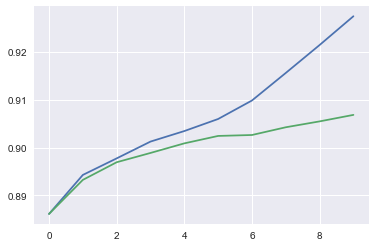

In [47]:
import sklearn.cross_validation
import numpy as np
import sklearn.learning_curve
import matplotlib.pyplot as plt
%matplotlib inline
max_depths = [1,2,3,4,5,6,7,8,9,10] # FILL ME IN
train_scores, test_scores = sklearn.learning_curve.validation_curve(
    RandomForestClassifier(), X_train, y_train, 'max_depth', max_depths)
plt.plot(np.mean(train_scores, axis=1), label='Train')
plt.plot(np.mean(test_scores, axis=1), label='Test')
# based on the plot the max_depth ~5

In [49]:
# grid search for the best params
from sklearn.grid_search import GridSearchCV
params = {'class_weight' : [{1:4},{1:3},{1:2}]}
grid = GridSearchCV(RandomForestClassifier(max_depth=5, n_estimators = 1000,max_features = 'auto'), 
                    params, scoring='log_loss')
evaluate_model(grid)

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: Dep

Train score: 0.244279583569
Test score: 0.243251174049
Total time: 141.355666876



0.24325117404902619

In [50]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={1: 2}, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [51]:
rf_mdeep = grid.best_estimator_

In [52]:
rf_mdeep.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 2}, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [54]:
from sklearn.metrics import classification_report
rf_mdeep.score(X_train, y_train)

0.90621863973325567

### Classification Reports:

In [59]:
from sklearn.metrics import classification_report
rf_pred_train= rf_mdeep.predict(X_train)
target_names = ['Class_No', 'Class_Yes']
print (classification_report(y_train,rf_pred_train, target_names=target_names))

             precision    recall  f1-score   support

   Class_No       0.93      0.97      0.95     27373
  Class_Yes       0.64      0.40      0.49      3518

avg / total       0.89      0.91      0.90     30891



In [60]:
rf_pred_Test = rf_mdeep.predict(X_test)
target_names = ['Class_No', 'Class_Yes']
print (classification_report(y_test,rf_pred_Test, target_names = target_names))

             precision    recall  f1-score   support

   Class_No       0.93      0.97      0.95      9175
  Class_Yes       0.62      0.42      0.50      1122

avg / total       0.90      0.91      0.90     10297



### Feature Importance:

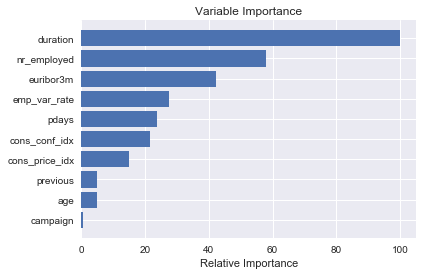

In [74]:
feature_importance = rf_mdeep.feature_importances_

#make importances relative to max importance
feature_importance = 100.0*(feature_importance / feature_importance.max())
show_features = feature_importance[:10] #top ten
sorted_idx =np.argsort(show_features)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, show_features[sorted_idx], align='center')
plt.yticks(pos,X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Feature ranking:
1. feature 1 (0.265260)
2. feature 9 (0.153226)
3. feature 8 (0.112300)
4. feature 5 (0.073326)
5. feature 3 (0.062600)
6. feature 7 (0.057008)
7. feature 60 (0.050351)
8. feature 11 (0.046993)
9. feature 6 (0.039608)
10. feature 12 (0.014854)
11. feature 4 (0.013226)
12. feature 0 (0.013001)
13. feature 41 (0.011067)
14. feature 42 (0.010810)
15. feature 59 (0.010390)
16. feature 48 (0.009678)
17. feature 49 (0.009290)
18. feature 58 (0.007169)
19. feature 51 (0.006458)
20. feature 43 (0.005062)
21. feature 52 (0.003991)
22. feature 35 (0.003032)
23. feature 34 (0.002408)
24. feature 47 (0.001927)
25. feature 2 (0.001749)
26. feature 14 (0.001550)
27. feature 21 (0.001233)
28. feature 18 (0.001092)
29. feature 10 (0.001065)
30. feature 33 (0.001042)
31. feature 54 (0.000886)
32. feature 44 (0.000726)
33. feature 45 (0.000636)
34. feature 50 (0.000613)
35. feature 29 (0.000597)
36. feature 46 (0.000591)
37. feature 26 (0.000489)
38. feature 53 (0.000383)
39. feature 25

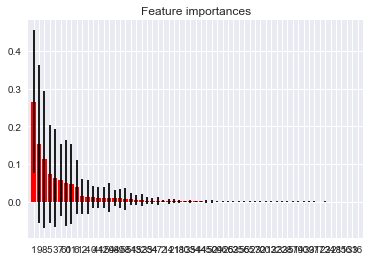

In [61]:
importances = rf_mdeep.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_mdeep.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [66]:
X_train.columns

Index([u'age', u'duration', u'campaign', u'pdays', u'previous',
       u'emp_var_rate', u'cons_price_idx', u'cons_conf_idx', u'euribor3m',
       u'nr_employed', u'strat_Campaign', u'strat_Pdays', u'strat_Previous',
       u'job_admin.', u'job_blue-collar', u'job_entrepreneur',
       u'job_housemaid', u'job_management', u'job_retired',
       u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'marital_divorced',
       u'marital_married', u'marital_single', u'education_basic.4y',
       u'education_basic.6y', u'education_basic.9y', u'education_high.school',
       u'education_illiterate', u'education_professional.course',
       u'education_university.degree', u'default_no', u'default_unknown',
       u'default_yes', u'housing_no', u'housing_yes', u'loan_no', u'loan_yes',
       u'contact_cellular', u'contact_telephone', u'month_apr', u'month_aug',
       u'month_dec', u'month_jul', u'month_jun', u'month_mar', u'month_may',
       u'mo